# 2010 Data

## Loading data

In [1]:
import pandas as pd

df_2010 = pd.read_csv('2010 household data new 1.csv')

In [2]:
df_2010.head(15)

,Town,Total,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
0,Ang Mo Kio,"179,297","87,113","92,184","146,966","71,220","75,746","12,873","6,355","6,518","14,952","7,532","7,420","4,506","2,006","2,500"
1,Cheng San,"30,503","14,883","15,620","24,815","12,064","12,751","2,437","1,221","1,216","2,539","1,291","1,248",712,307,405
2,Chong Boon,"29,903","14,671","15,232","24,613","12,043","12,570","2,005",989,"1,016","2,625","1,346","1,279",660,293,367
3,Kebun Bahru,"25,854","12,513","13,341","20,486","9,864","10,622","2,338","1,172","1,166","2,331","1,167","1,164",699,310,389
4,Sembawang Hills,"6,851","3,261","3,590","6,008","2,830","3,178",115,58,57,526,263,263,202,110,92
5,Shangri-La,"21,071","10,345","10,726","16,511","8,083","8,428","2,049","1,023","1,026","2,034","1,035",999,477,204,273
6,Sindo,"7,287","3,520","3,767","6,431","3,109","3,322",73,32,41,518,259,259,265,120,145
7,Ang Mo Kio Town Centre,"4,982","2,419","2,563","4,302","2,100","2,202",235,108,127,296,142,154,149,69,80
8,Townsville,"21,403","10,270","11,133","17,788","8,543","9,245","1,452",691,761,"1,683",823,860,480,213,267
9,Yio Chu Kang,"31,443","15,231","16,212","26,012","12,584","13,428","2,169","1,061","1,108","2,400","1,206","1,194",862,380,482


## Cleaning dataset for 2010

In [3]:
def clean(text):
    cleaned = text[9:-1]
    return cleaned 
df_2010['Town'] = df_2010['Town'].apply(clean)

In [4]:
def checkfirst(text):
    if text[0].isalpha():
        return True
    return False
town_list = []
sub_town = []
curr_town = ""
     
for i in df_2010['Town']:
    if i[0].isalpha():
        curr_town = i.strip()
        town_list.append(curr_town)
        sub_town.append(curr_town)
    else:
        town_list.append(curr_town)
        sub_town.append(i.strip())

In [5]:
df_2010['main_town'] = pd.DataFrame(town_list)
df_2010['sub_town'] = pd.DataFrame(sub_town)

In [6]:
cols = ['main_town',
       'sub_town','Town', ' Total ', ' Total Males ', 'Total Females ', ' Total Chinese',
       'Chinese Males ', 'Chinese Females ', 'Total Malays', 'Malay Males ',
       'Malay Females ', 'Total Indians', 'Indian Males ', 'Indian Females ',
       'Total Others ', 'Other Males ', 'Other Females ']
df_2010 = df_2010[cols]
df_2010.columns = ['main_town',
       'sub_town','Town', 'Total', 'Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']

In [7]:
df_2010 = df_2010.drop(columns='Town')

In [8]:
df_2010.head(15)

,main_town,sub_town,Total,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
0,Ang Mo Kio,Ang Mo Kio,"179,297","87,113","92,184","146,966","71,220","75,746","12,873","6,355","6,518","14,952","7,532","7,420","4,506","2,006","2,500"
1,Ang Mo Kio,Cheng San,"30,503","14,883","15,620","24,815","12,064","12,751","2,437","1,221","1,216","2,539","1,291","1,248",712,307,405
2,Ang Mo Kio,Chong Boon,"29,903","14,671","15,232","24,613","12,043","12,570","2,005",989,"1,016","2,625","1,346","1,279",660,293,367
3,Ang Mo Kio,Kebun Bahru,"25,854","12,513","13,341","20,486","9,864","10,622","2,338","1,172","1,166","2,331","1,167","1,164",699,310,389
4,Ang Mo Kio,Sembawang Hills,"6,851","3,261","3,590","6,008","2,830","3,178",115,58,57,526,263,263,202,110,92
5,Ang Mo Kio,Shangri-La,"21,071","10,345","10,726","16,511","8,083","8,428","2,049","1,023","1,026","2,034","1,035",999,477,204,273
6,Ang Mo Kio,Sindo,"7,287","3,520","3,767","6,431","3,109","3,322",73,32,41,518,259,259,265,120,145
7,Ang Mo Kio,Ang Mo Kio Town Centre,"4,982","2,419","2,563","4,302","2,100","2,202",235,108,127,296,142,154,149,69,80
8,Ang Mo Kio,Townsville,"21,403","10,270","11,133","17,788","8,543","9,245","1,452",691,761,"1,683",823,860,480,213,267
9,Ang Mo Kio,Yio Chu Kang,"31,443","15,231","16,212","26,012","12,584","13,428","2,169","1,061","1,108","2,400","1,206","1,194",862,380,482


In [9]:
import re
def clean_comma(text):
    cleaned = re.sub(',', '',text)
    return int(cleaned)
data_2010 = df_2010.replace(' - ','0')
data_2010 = data_2010.replace(" NaN ", '0')
data_2010.drop('Total', axis=1,inplace= True)

cols = ['Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']
for i in cols:  
    data_2010[i] = data_2010[i].apply(clean_comma)
    

In [15]:
data_2010 = data_2010.drop(data_2010[data_2010.main_town == data_2010.sub_town].index)

## Grouping subtowns into their main towns

In [16]:
df_grpby_2010 = data_2010.groupby(['main_town','sub_town']).sum()

In [17]:
grpby_dict = df_grpby_2010.to_dict()

# 2015 Data

## Loading data

In [18]:
import pandas as pd

df_2015 = pd.read_csv('2015 household data new.csv')
df_2015.head()

,Town,Total,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
0,Ang Mo Kio,"174,770","84,220","90,550","143,290","68,860","74,430","13,060","6,430","6,640","14,150","7,050","7,100","4,270","1,890","2,390"
1,Ang Mo Kio Town Centre,"5,020","2,370","2,640","4,260","2,020","2,240",210,90,120,360,170,190,190,100,90
2,Cheng San,"29,770","14,400","15,370","24,660","11,890","12,770","2,140","1,080","1,060","2,380","1,210","1,170",600,230,370
3,Chong Boon,"27,900","13,590","14,310","22,910","11,150","11,760","1,950",950,"1,010","2,400","1,230","1,170",630,260,370
4,Kebun Bahru,"23,910","11,450","12,460","19,210","9,160","10,060","2,200","1,090","1,110","1,910",940,960,590,270,330


## Cleaning data

In [19]:
def clean(text):
    cleaned = text[5:]
    return cleaned 
df_2015['Town'] = df_2015['Town'].apply(clean)

In [20]:
town_list = []
sub_town = []
curr_town = ''
for i in df_2015['Town']:
    if i[0].isalpha():
        curr_town = i.strip()
        town_list.append(curr_town)
        sub_town.append(curr_town)
    else:
        town_list.append(curr_town)
        sub_town.append(i.strip())

In [21]:
# for i in range(len(town_list)):
#     if town_list[i] != None:
#         town_list[i] = town_list[i][0:-7]

In [22]:
df_2015['main_town'] = pd.DataFrame(town_list)
df_2015['sub_town'] = pd.DataFrame(sub_town)

In [23]:
cols = ['main_town',
       'sub_town','Town', ' Total ', ' Total Males ', 'Total Females ', ' Total Chinese',
       'Chinese Males ', 'Chinese Females ', 'Total Malays', 'Malay Males ',
       'Malay Females ', 'Total Indians', 'Indian Males ', 'Indian Females ',
       'Total Others ', 'Other Males ', 'Other Females ']
df_2015 = df_2015[cols]
df_2015.columns = ['main_town',
       'sub_town','Town', 'Total', 'Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']

In [24]:
df_2015 = df_2015.drop(columns='Town')

In [25]:
df_2015.head(15)

,main_town,sub_town,Total,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
0,Ang Mo Kio,Ang Mo Kio,"174,770","84,220","90,550","143,290","68,860","74,430","13,060","6,430","6,640","14,150","7,050","7,100","4,270","1,890","2,390"
1,Ang Mo Kio,Ang Mo Kio Town Centre,"5,020","2,370","2,640","4,260","2,020","2,240",210,90,120,360,170,190,190,100,90
2,Ang Mo Kio,Cheng San,"29,770","14,400","15,370","24,660","11,890","12,770","2,140","1,080","1,060","2,380","1,210","1,170",600,230,370
3,Ang Mo Kio,Chong Boon,"27,900","13,590","14,310","22,910","11,150","11,760","1,950",950,"1,010","2,400","1,230","1,170",630,260,370
4,Ang Mo Kio,Kebun Bahru,"23,910","11,450","12,460","19,210","9,160","10,060","2,200","1,090","1,110","1,910",940,960,590,270,330
5,Ang Mo Kio,Sembawang Hills,"6,890","3,240","3,650","6,080","2,850","3,230",100,50,50,500,230,270,220,110,110
6,Ang Mo Kio,Shangri-La,"18,510","9,090","9,410","13,900","6,810","7,090","2,410","1,200","1,210","1,790",920,880,410,170,240
7,Ang Mo Kio,Tagore,"8,350","3,990","4,360","7,440","3,540","3,900",70,40,40,560,270,290,270,140,140
8,Ang Mo Kio,Townsville,"23,770","11,300","12,470","19,630","9,320","10,310","1,660",800,860,"1,900",930,970,580,250,330
9,Ang Mo Kio,Yio Chu Kang,30,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [26]:
data_2015 = df_2015.replace(' - ','0')
data_2015 = data_2015.replace(" NaN ", '0')
data_2015.drop('Total', axis=1,inplace= True)

cols = ['Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']
for i in cols:  
    data_2015[i] = data_2015[i].apply(clean_comma)

In [27]:
data_2015.head()

,main_town,sub_town,Total Males,Total Females,Total Chinese,Chinese Males,Chinese Females,Total Malays,Malay Males,Malay Females,Total Indians,Indian Males,Indian Females,Total Others,Other Males,Other Females
0,Ang Mo Kio,Ang Mo Kio,84220,90550,143290,68860,74430,13060,6430,6640,14150,7050,7100,4270,1890,2390
1,Ang Mo Kio,Ang Mo Kio Town Centre,2370,2640,4260,2020,2240,210,90,120,360,170,190,190,100,90
2,Ang Mo Kio,Cheng San,14400,15370,24660,11890,12770,2140,1080,1060,2380,1210,1170,600,230,370
3,Ang Mo Kio,Chong Boon,13590,14310,22910,11150,11760,1950,950,1010,2400,1230,1170,630,260,370
4,Ang Mo Kio,Kebun Bahru,11450,12460,19210,9160,10060,2200,1090,1110,1910,940,960,590,270,330


In [28]:
data_2015 = data_2015.drop(data_2015[data_2015.main_town == data_2015.sub_town].index)

### Grouping subtowns into their main towns

In [29]:
df_grpby_2015 = data_2015.groupby(['main_town','sub_town'], as_index=True).sum()

In [30]:
df_grpby_2015

Total Males  Total Females  \
main_town       sub_town                                                
Ang Mo Kio      Ang Mo Kio Town Centre            2370           2640   
                Cheng San                        14400          15370   
                Chong Boon                       13590          14310   
                Kebun Bahru                      11450          12460   
                Sembawang Hills                   3240           3650   
                Shangri-La                        9090           9410   
                Tagore                            3990           4360   
                Townsville                       11300          12470   
                Yio Chu Kang                         0              0   
                Yio Chu Kang East                 2020           2060   
                Yio Chu Kang North                   0              0   
                Yio Chu Kang West                12750          13800   
Bedok           Bayshore                          3580           3900   
                Bedok North                      41990          43940   
                Bedok Reservoir                  12420          12980   
                Bedok South                      25010          26180   
                Frankel                          15920          17650   
                Kaki Bukit                       20220          20600   
                Kembangan                        18870          19570   
                Siglap                            3210           3720   
Bishan          Bishan East                      13760          15060   
                Marymount                        15650          15880   
                Upper Thomson                    14700          15640   
Boon Lay        Liu Fang                             0              0   
                Samulun                              0              0   
                Shipyard                             0              0   
                Tukang                               0              0   
Bukit Batok     Brickworks                           0              0   
                Bukit Batok Central              12780          13280   
                Bukit Batok East                  7280           7290   
...                                                ...            ...   
Toa Payoh       Toa Payoh Central                14410          16340   
                Toa Payoh West                    6140           7220   
                Woodleigh                         1200           1240   
Tuas            Tengeh                               0              0   
                Tuas Bay                             0              0   
                Tuas North                           0              0   
                Tuas Promenade                       0              0   
                Tuas View                            0              0   
                Tuas View Extension                  0              0   
Western Islands Jurong Island and Bukom              0              0   
                Semakau                              0              0   
                Sudong                               0              0   
Woodlands       Greenwood Park                       0              0   
                Midview                          17780          17730   
                North Coast                       7450           7160   
                Senoko West                          0              0   
                Woodgrove                        17960          17880   
                Woodlands East                   47840          47660   
                Woodlands Regional Centre            0              0   
                Woodlands South                  17970          17860   
                Woodlands West                   16850          16040   
Yishun          Khatib                            5300           5550   
                Lower Seleta

## Retrieval of only common towns

In [31]:
common_towns = ['Ang Mo Kio', 'Bukit Batok', 'Bukit Merah', 'Bukit Panjang', 'Changi', 'Choa Chu Kang', 'Clementi', 'Downtown Core', 'Geylang', 'Hougang', 'Jurong East', 'Jurong West', 'Kallang', 'Mandai', 'Marine Parade', 'Newton', 'Novena', 'Outram', 'Pasir Ris', 'Punggol']
cols = ['Total', 'Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']

x = pd.DataFrame()
for i in range(len(df_grpby_2015)):
    if df_grpby_2015.index[i][0] in common_towns:
        x = x.append(df_grpby_2015.iloc[i])
for i in range(len(df_grpby_2010)):
    if df_grpby_2015.index[i][0] in common_towns:
        x = x.append(df_grpby_2010.iloc[i])

In [32]:
common_towns = ['Ang Mo Kio', 'Bukit Batok', 'Bukit Merah', 'Bukit Panjang', 'Changi', 'Choa Chu Kang', 'Clementi', 'Downtown Core', 'Geylang', 'Hougang', 'Jurong East', 'Jurong West', 'Kallang', 'Mandai', 'Marine Parade', 'Newton', 'Novena', 'Outram', 'Pasir Ris', 'Punggol']
cols = ['Total', 'Total Males', 'Total Females', 'Total Chinese',
       'Chinese Males', 'Chinese Females', 'Total Malays', 'Malay Males',
       'Malay Females', 'Total Indians', 'Indian Males', 'Indian Females',
       'Total Others', 'Other Males', 'Other Females']

data_2010 = pd.DataFrame()
data_2015 = pd.DataFrame()
for i in range(len(df_grpby_2010)):
    if df_grpby_2010.index[i][0] in common_towns:
        data_2010 = data_2010.append(df_grpby_2010.iloc[i])

for i in range(len(df_grpby_2015)):
    if df_grpby_2015.index[i][0] in common_towns:
        data_2015 = data_2015.append(df_grpby_2015.iloc[i])


In [33]:
x = x.reset_index()

#### *condition here refers to the list of common subtowns between 2010 and 2015*

In [34]:
constant_sub_towns = pd.DataFrame(x['index'].value_counts() == 2).reset_index()
constant_sub_towns = constant_sub_towns[constant_sub_towns['index'] == True]
condition = constant_sub_towns['level_0'].values.tolist()

x[x['index'].isin(condition)].head()

,index,Chinese Females,Chinese Males,Indian Females,Indian Males,Malay Females,Malay Males,Other Females,Other Males,Total Chinese,Total Females,Total Indians,Total Malays,Total Males,Total Others
0,"(Ang Mo Kio, Ang Mo Kio Town Centre)",2240.0,2020.0,190.0,170.0,120.0,90.0,90.0,100.0,4260.0,2640.0,360.0,210.0,2370.0,190.0
1,"(Ang Mo Kio, Cheng San)",12770.0,11890.0,1170.0,1210.0,1060.0,1080.0,370.0,230.0,24660.0,15370.0,2380.0,2140.0,14400.0,600.0
2,"(Ang Mo Kio, Chong Boon)",11760.0,11150.0,1170.0,1230.0,1010.0,950.0,370.0,260.0,22910.0,14310.0,2400.0,1950.0,13590.0,630.0
3,"(Ang Mo Kio, Kebun Bahru)",10060.0,9160.0,960.0,940.0,1110.0,1090.0,330.0,270.0,19210.0,12460.0,1910.0,2200.0,11450.0,590.0
4,"(Ang Mo Kio, Sembawang Hills)",3230.0,2850.0,270.0,230.0,50.0,50.0,110.0,110.0,6080.0,3650.0,500.0,100.0,3240.0,220.0


In [35]:
data_2010 = data_2010.reset_index()
data_2015 = data_2015.reset_index()

In [36]:
data_2015_common = data_2015[data_2015['index'].isin(condition)].set_index("index")
data_2010_common = data_2010[data_2010['index'].isin(condition)].set_index("index")

### Obtaining the % difference between 2015 and 2010

In [37]:
perc_difference = (data_2015_common - data_2010_common)/data_2010_common * 100
perc_difference.head()

,Chinese Females,Chinese Males,Indian Females,Indian Males,Malay Females,Malay Males,Other Females,Other Males,Total Chinese,Total Females,Total Indians,Total Malays,Total Males,Total Others
index,,,,,,,,,,,,,,
"(Ang Mo Kio, Ang Mo Kio Town Centre)",1.725704,-3.809524,23.376623,19.718310,-5.511811,-16.666667,12.500000,44.927536,-0.976290,3.004292,21.621622,-10.638298,-2.025630,27.516779
"(Ang Mo Kio, Cheng San)",0.149008,-1.442308,-6.250000,-6.274206,-12.828947,-11.547912,-8.641975,-25.081433,-0.624622,-1.600512,-6.262308,-12.187115,-3.245313,-15.730337
"(Ang Mo Kio, Chong Boon)",-6.443914,-7.415096,-8.522283,-8.618128,-0.590551,-3.943377,0.817439,-11.262799,-6.919108,-6.053046,-8.571429,-2.743142,-7.368278,-4.545455
"(Ang Mo Kio, Kebun Bahru)",-5.290906,-7.137064,-17.525773,-19.451585,-4.802744,-6.996587,-15.167095,-12.903226,-6.228644,-6.603703,-18.060918,-5.902481,-8.495165,-15.593705
"(Ang Mo Kio, Sembawang Hills)",1.636249,0.706714,2.661597,-12.547529,-12.280702,-13.793103,19.565217,0.000000,1.198402,1.671309,-4.942966,-13.043478,-0.643974,8.910891


### Obtaining the absolute difference between 2015 and 2010

In [38]:
abs_difference = (data_2015_common - data_2010_common)

In [39]:
abs_difference.head()

,Chinese Females,Chinese Males,Indian Females,Indian Males,Malay Females,Malay Males,Other Females,Other Males,Total Chinese,Total Females,Total Indians,Total Malays,Total Males,Total Others
index,,,,,,,,,,,,,,
"(Ang Mo Kio, Ang Mo Kio Town Centre)",38.0,-80.0,36.0,28.0,-7.0,-18.0,10.0,31.0,-42.0,77.0,64.0,-25.0,-49.0,41.0
"(Ang Mo Kio, Cheng San)",19.0,-174.0,-78.0,-81.0,-156.0,-141.0,-35.0,-77.0,-155.0,-250.0,-159.0,-297.0,-483.0,-112.0
"(Ang Mo Kio, Chong Boon)",-810.0,-893.0,-109.0,-116.0,-6.0,-39.0,3.0,-33.0,-1703.0,-922.0,-225.0,-55.0,-1081.0,-30.0
"(Ang Mo Kio, Kebun Bahru)",-562.0,-704.0,-204.0,-227.0,-56.0,-82.0,-59.0,-40.0,-1276.0,-881.0,-421.0,-138.0,-1063.0,-109.0
"(Ang Mo Kio, Sembawang Hills)",52.0,20.0,7.0,-33.0,-7.0,-8.0,18.0,0.0,72.0,60.0,-26.0,-15.0,-21.0,18.0


In [40]:
difference_df = df_grpby_2015-df_grpby_2010

In [41]:
difference_clean = difference_df.dropna()

In [42]:
difference_clean.columns
difference_clean.drop(['Total Males',"Total Females","Total Chinese", "Total Malays","Total Indians","Total Others"], axis = 1,inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [43]:
# difference_clean[['Chinese Males', "Chinese Females"]]

In [44]:
difference_df_perc = (df_grpby_2015-df_grpby_2010)/df_grpby_2010*100
# difference_df_perc.head()
difference_df_perc.dropna(inplace=True)
difference_df_perc.drop(['Total Males',"Total Females","Total Chinese", "Total Malays","Total Indians","Total Others"], axis = 1,inplace=True)
difference_df_perc.head()

Chinese Males  Chinese Females  \
main_town  sub_town                                                 
Ang Mo Kio Ang Mo Kio Town Centre      -3.809524         1.725704   
           Cheng San                   -1.442308         0.149008   
           Chong Boon                  -7.415096        -6.443914   
           Kebun Bahru                 -7.137064        -5.290906   
           Sembawang Hills              0.706714         1.636249   

                                   Malay Males  Malay Females  Indian Males  \
main_town  sub_town                                                           
Ang Mo Kio Ang Mo Kio Town Centre   -16.666667      -5.511811     19.718310   
           Cheng San                -11.547912     -12.828947     -6.274206   
           Chong Boon                -3.943377      -0.590551     -8.618128   
           Kebun Bahru               -6.996587      -4.802744    -19.451585   
           Sembawang Hills          -13.793103     -12.280702    -12.547529   

                                   Indian Females  Other Males  Other Females  
main_town  sub_town                                                            
Ang Mo Kio Ang Mo Kio Town Centre       23.376623    44.927536      12.500000  
           Cheng San                    -6.250000   -25.081433      -8.641975  
           Chong Boon                   -8.522283   -11.262799       0.817439  
           Kebun Bahru                 -17.525773   -12.903226     -15.167095  
           Sembawang Hills               2.661597     0.000000      19.565217

In [45]:
def summation(col1, col2):
    if col1 < 0 and col2 < 0:
        return col1 - col2
    else:
        return col1 + col2 

chineseChange_df = pd.DataFrame(difference_clean[['Chinese Males', "Chinese Females"]].apply(lambda x: summation(x['Chinese Males'],x['Chinese Females']),axis =1),columns=["net_change_chinese"])
display(chineseChange_df.head())
chineseMainTownChange_df = chineseChange_df.reset_index().groupby('main_town').sum()
display(chineseMainTownChange_df.head())

chinesePercChange_df = pd.DataFrame(difference_df_perc[['Chinese Males', "Chinese Females"]].apply(lambda x: summation(x['Chinese Males'],x['Chinese Females']),axis =1),columns=["perc_change_chinese"])
display(chinesePercChange_df.head())
chineseMainTownPercChange_df = chinesePercChange_df.reset_index().groupby('main_town').sum()
display(chineseMainTownPercChange_df.head())

net_change_chinese
main_town  sub_town                                  
Ang Mo Kio Ang Mo Kio Town Centre               -42.0
           Cheng San                           -155.0
           Chong Boon                           -83.0
           Kebun Bahru                         -142.0
           Sembawang Hills                       72.0

,net_change_chinese
main_town,
Ang Mo Kio,2401.0
Bedok,3888.0
Bishan,2001.0
Bukit Batok,1129.0
Bukit Merah,4270.0


perc_change_chinese
main_town  sub_town                                   
Ang Mo Kio Ang Mo Kio Town Centre            -2.083820
           Cheng San                         -1.293300
           Chong Boon                        -0.971182
           Kebun Bahru                       -1.846158
           Sembawang Hills                    2.342963

,perc_change_chinese
main_town,
Ang Mo Kio,16.889959
Bedok,63.478527
Bishan,15.615389
Bukit Batok,28.093006
Bukit Merah,202.125004


### Malay Info

In [46]:
malayChange_df = pd.DataFrame(difference_clean[['Malay Males', "Malay Females"]].apply(lambda x: summation(x['Malay Males'],x['Malay Females']),axis =1),columns=["net_change_malay"])
display(malayChange_df.head())
malayMainTownChange_df = malayChange_df.reset_index().groupby('main_town').sum()
display(malayMainTownChange_df.head())

malayPercChange_df = pd.DataFrame(difference_df_perc[['Malay Males', "Malay Females"]].apply(lambda x: summation(x['Malay Males'],x['Malay Females']),axis =1),columns=["perc_change_malay"])
display(malayPercChange_df.head())
malayMainTownPercChange_df = malayPercChange_df.reset_index().groupby('main_town').sum()
display(malayMainTownPercChange_df.head())

net_change_malay
main_town  sub_town                                
Ang Mo Kio Ang Mo Kio Town Centre             -11.0
           Cheng San                           15.0
           Chong Boon                         -33.0
           Kebun Bahru                        -26.0
           Sembawang Hills                     -1.0

,net_change_malay
main_town,
Ang Mo Kio,560.0
Bedok,121.0
Bishan,31.0
Bukit Batok,99.0
Bukit Merah,2144.0


perc_change_malay
main_town  sub_town                                 
Ang Mo Kio Ang Mo Kio Town Centre         -11.154856
           Cheng San                        1.281036
           Chong Boon                      -3.352826
           Kebun Bahru                     -2.193843
           Sembawang Hills                 -1.512402

,perc_change_malay
main_town,
Ang Mo Kio,47.086325
Bedok,17.299066
Bishan,4.601568
Bukit Batok,6.525481
Bukit Merah,844.322752


### Indian Info

In [47]:
indianChange_df = pd.DataFrame(difference_clean[['Indian Males', "Indian Females"]].apply(lambda x: summation(x['Indian Males'],x['Indian Females']),axis =1),columns=["net_change_indian"])
display(indianChange_df.head())
indianMainTownChange_df = indianChange_df.reset_index().groupby('main_town').sum()
display(indianMainTownChange_df.head())

indianPercChange_df = pd.DataFrame(difference_df_perc[['Indian Males', "Indian Females"]].apply(lambda x: summation(x['Indian Males'],x['Indian Females']),axis =1),columns=["perc_change_indian"])
display(indianPercChange_df.head())
indianMainTownPercChange_df = indianPercChange_df.reset_index().groupby('main_town').sum()
display(indianMainTownPercChange_df.head())

net_change_indian
main_town  sub_town                                 
Ang Mo Kio Ang Mo Kio Town Centre               64.0
           Cheng San                            -3.0
           Chong Boon                           -7.0
           Kebun Bahru                         -23.0
           Sembawang Hills                     -26.0

,net_change_indian
main_town,
Ang Mo Kio,214.0
Bedok,896.0
Bishan,-43.0
Bukit Batok,-71.0
Bukit Merah,305.0


perc_change_indian
main_town  sub_town                                  
Ang Mo Kio Ang Mo Kio Town Centre           43.094933
           Cheng San                        -0.024206
           Chong Boon                       -0.095845
           Kebun Bahru                      -1.925812
           Sembawang Hills                  -9.885932

,perc_change_indian
main_town,
Ang Mo Kio,57.755852
Bedok,125.602195
Bishan,-3.136329
Bukit Batok,13.030983
Bukit Merah,208.375339


### Other Info

In [48]:
otherChange_df = pd.DataFrame(difference_clean[['Other Males', "Other Females"]].apply(lambda x: summation(x['Other Males'],x['Other Females']),axis =1),columns=["net_change_other"])
display(otherChange_df.head())
otherMainTownChange_df = otherChange_df.reset_index().groupby('main_town').sum()
display(otherMainTownChange_df.head())

otherPercChange_df = pd.DataFrame(difference_df_perc[['Other Males', "Other Females"]].apply(lambda x: summation(x['Other Males'],x['Other Females']),axis =1),columns=["perc_change_other"])
display(otherPercChange_df.head())
otherMainTownPercChange_df = otherPercChange_df.reset_index().groupby('main_town').sum()
display(otherMainTownPercChange_df.head())

net_change_other
main_town  sub_town                                
Ang Mo Kio Ang Mo Kio Town Centre              41.0
           Cheng San                          -42.0
           Chong Boon                         -30.0
           Kebun Bahru                         19.0
           Sembawang Hills                     18.0

,net_change_other
main_town,
Ang Mo Kio,207.0
Bedok,174.0
Bishan,91.0
Bukit Batok,79.0
Bukit Merah,427.0


perc_change_other
main_town  sub_town                                 
Ang Mo Kio Ang Mo Kio Town Centre          57.427536
           Cheng San                      -16.439458
           Chong Boon                     -10.445360
           Kebun Bahru                      2.263869
           Sembawang Hills                 19.565217

,perc_change_other
main_town,
Ang Mo Kio,88.759448
Bedok,36.179214
Bishan,23.620831
Bukit Batok,35.310456
Bukit Merah,565.233602


## All races combined into one DataFrame

In [49]:
allChange_df = chineseChange_df.join([malayChange_df,indianChange_df,otherChange_df])
allPercChange_df = chinesePercChange_df.join([malayPercChange_df,indianPercChange_df,otherPercChange_df])
display(allChange_df.reset_index().groupby('main_town').sum())
display(allPercChange_df.reset_index().groupby('main_town').sum())

,net_change_chinese,net_change_malay,net_change_indian,net_change_other
main_town,,,,
Ang Mo Kio,2401.0,560.0,214.0,207.0
Bedok,3888.0,121.0,896.0,174.0
Bishan,2001.0,31.0,-43.0,91.0
Bukit Batok,1129.0,99.0,-71.0,79.0
Bukit Merah,4270.0,2144.0,305.0,427.0
Bukit Panjang,9251.0,2255.0,1433.0,358.0
Bukit Timah,3796.0,90.0,237.0,197.0
Changi,127.0,167.0,42.0,16.0
Choa Chu Kang,226.0,869.0,321.0,74.0


,perc_change_chinese,perc_change_malay,perc_change_indian,perc_change_other
main_town,,,,
Ang Mo Kio,16.889959,47.086325,57.755852,88.759448
Bedok,63.478527,17.299066,125.602195,36.179214
Bishan,15.615389,4.601568,-3.136329,23.620831
Bukit Batok,28.093006,6.525481,13.030983,35.310456
Bukit Merah,202.125004,844.322752,208.375339,565.233602
Bukit Panjang,211.135318,278.938365,287.603507,202.049194
Bukit Timah,139.255758,235.694201,139.978386,67.453471
Changi,39.334562,100.197498,25.024494,72.727273
Choa Chu Kang,1.469954,29.074251,29.786009,19.775311


## Transferred table from Election_statistics file
#### This table is the subtraction result between 2015 and 2011

In [50]:
df_elec_stats = pd.DataFrame({'vote_count': {('Aljunied', 'GRC', 'WP'): -2239.0,
  ('Ang Mo Kio', 'GRC', 'RP'): 22639.0,
  ('Bishan-Toa Payoh', 'GRC', 'SPP'): 24316.0,
  ('Bukit Panjang', 'SMC', 'SDP'): 1579.0,
  ('Chua Chu Kang', 'GRC', 'PAP'): "nan",
  ('Chua Chu Kang', 'GRC', 'PPP'): "nan",
  ('East Coast', 'GRC', 'WP'): -4899.0,
  ('Holland-Bukit Timah', 'GRC', 'SDP'): 14013.0,
  ('Hong Kah North', 'SMC', 'SPP'): 1472.0,
  ('Hougang', 'SMC', 'WP'): -1823.0,
  ('Jurong', 'GRC', 'PAP'): "nan",
  ('Jurong', 'GRC', 'SGF'): "nan",
  ('Marine Parade', 'GRC', 'PAP'): "nan",
  ('Marine Parade', 'GRC', 'WP'): "nan",
  ('Mountbatten', 'SMC', 'PAP'): "nan",
  ('Mountbatten', 'SMC', 'SPP'): "nan",
  ('Nee Soon', 'GRC', 'WP'): 1547.0,
  ('Pasir Ris-Punggol', 'GRC', 'SDA'): 24673.0,
  ('Pioneer', 'SMC', 'PAP'): 3424.0,
  ('Potong Pasir', 'SMC', 'SPP'): 2610.0,
  ('Punggol East', 'SMC', 'WP'): -17.0,
  ('Radin Mas', 'SMC', 'PAP'): "nan",
  ('Radin Mas', 'SMC', 'RP'): "nan",
  ('Sembawang', 'GRC', 'PAP'): "nan",
  ('Sembawang', 'GRC', 'SDP'): "nan",
  ('Sengkang West', 'SMC', 'WP'): 2897.0,
  ('Tampines', 'GRC', 'PAP'): 22577.0,
  ('Tanjong Pagar', 'GRC', 'PAP'): "nan",
  ('Tanjong Pagar', 'GRC', 'SGF'): "nan",
  ('West Coast', 'GRC', 'RP'): -1349.0,
  ('Yuhua', 'SMC', 'SDP'): 1231.0},
 'vote_percentage': {('Aljunied', 'GRC', 'WP'): -0.03759999999999997,
  ('Ang Mo Kio', 'GRC', 'RP'): 0.09309999999999996,
  ('Bishan-Toa Payoh', 'GRC', 'SPP'): 0.16659999999999997,
  ('Bukit Panjang', 'SMC', 'SDP'): 0.021100000000000008,
  ('Chua Chu Kang', 'GRC', 'PAP'): "nan",
  ('Chua Chu Kang', 'GRC', 'PPP'): "nan",
  ('East Coast', 'GRC', 'WP'): 0.05899999999999994,
  ('Holland-Bukit Timah', 'GRC', 'SDP'): 0.06520000000000004,
  ('Hong Kah North', 'SMC', 'SPP'): 0.04150000000000009,
  ('Hougang', 'SMC', 'WP'): -0.07140000000000002,
  ('Jurong', 'GRC', 'PAP'): "nan",
  ('Jurong', 'GRC', 'SGF'): "nan",
  ('Marine Parade', 'GRC', 'PAP'): "nan",
  ('Marine Parade', 'GRC', 'WP'): "nan",
  ('Mountbatten', 'SMC', 'PAP'): "nan",
  ('Mountbatten', 'SMC', 'SPP'): "nan",
  ('Nee Soon', 'GRC', 'WP'): 0.08430000000000004,
  ('Pasir Ris-Punggol', 'GRC', 'SDA'): 0.08099999999999996,
  ('Pioneer', 'SMC', 'PAP'): 0.1562,
  ('Potong Pasir', 'SMC', 'SPP'): 0.1603,
  ('Punggol East', 'SMC', 'WP'): -0.027699999999999947,
  ('Radin Mas', 'SMC', 'PAP'): "nan",
  ('Radin Mas', 'SMC', 'RP'): "nan",
  ('Sembawang', 'GRC', 'PAP'): "nan",
  ('Sembawang', 'GRC', 'SDP'): "nan",
  ('Sengkang West', 'SMC', 'WP'): 0.040200000000000014,
  ('Tampines', 'GRC', 'PAP'): 0.14849999999999997,
  ('Tanjong Pagar', 'GRC', 'PAP'): "nan",
  ('Tanjong Pagar', 'GRC', 'SGF'): "nan",
  ('West Coast', 'GRC', 'RP'): 0.12,
  ('Yuhua', 'SMC', 'SDP'): 0.06690000000000007}})


In [51]:
df_elec_stats_1 = df_elec_stats[df_elec_stats['vote_count'] != 'nan']
df_elec_stats_2 = df_elec_stats_1.reset_index().set_index('level_0')

In [52]:
import statsmodels.api as sm

In [53]:
import pprint
data = {'Bishan': ['Bishan-Toa Payoh'], 'Bukit Merah': ['Jalan Besar', 'Radin Mas', 'Tanjong Pagar', 'West Coast'], 'Geylang': ['Jalan Besar', 'MacPherson', 'Marine Parade', 'Mountbatten', 'Potong Pasir'], 'Kallang': ['Jalan Besar', 'Mountbatten', 'Tanjong Pagar'], 'Marine Parade': ['Marine Parade', 'Mountbatten'], 'Queenstown': ['Holland-Bukit Timah', 'Tanjong Pagar', 'West Coast'], 'Toa Payoh': ['Bishan-Toa Payoh', 'Marine Parade', 'Potong Pasir'], 'Bedok': ['Aljunied', 'East Coast', 'Fengshan', 'Marine Parade'], 'Changi': ['East Coast'], 'Pasir Ris': ['Pasir Ris-Punggol'], 'North-Eastern Islands': ['East Coast'], 'Tampines': ['Aljunied', 'Pasir Ris-Punggol', 'East Coast', 'Tampines'], 'Central Water Catchment': ['Holland-Bukit Timah'], 'Woodlands': ['Marsiling-Yew Tee', 'Sembawang'], 'Ang Mo Kio': ['Ang Mo Kio', 'Nee Soon'], 'Bukit Batok': ['Bukit Batok', 'Chua Chu Kang', 'Hong Kah North', 'Jurong'], 'Bukit Panjang': ['Bukit Panjang', 'Holland-Bukit Timah'], 'Clementi': ['Holland-Bukit Timah', 'Jurong', 'West Coast'], 'Bukit Timah': ['Holland-Bukit Timah', 'Jurong', 'Tanjong Pagar'], 'Central Area': ['Jalan Besar', 'Mountbatten', 'Tanjong Pagar'], 'Jurong East': ['Jurong', 'West Coast', 'Yuhua'], 'Tuas': ['West Coast'], 'Western Water Catchment': ['Chua Chu Kang'], 'Sungei Kadut': ['Marsiling-Yew Tee'], 'Choa Chu Kang': ['Chua Chu Kang', 'Marsiling-Yew Tee'], 'Tengah': ['Hong Kah North'], 'Novena': ['Bishan-Toa Payoh', 'Holland-Bukit Timah', 'Jalan Besar', 'Tanjong Pagar'], 'Serangoon': ['Aljunied', 'Ang Mo Kio', 'Marine Parade'], 'Hougang': ['Aljunied', 'Ang Mo Kio', 'Hougang', 'Marine Parade'], 'Mandai': ['Marsiling-Yew Tee', 'Nee Soon'], 'Yishun': ['Ang Mo Kio', 'Nee Soon', 'Sembawang'], 'Sembawang': ['Sembawang'], 'Seletar': ['Ang Mo Kio'], 'Punggol': ['Pasir Ris-Punggol']}

scraped_data = {}
for key in data:
    list_of_const = data[key]
    
    for item in list_of_const:
        if item not in scraped_data:
            scraped_data[item] = [key]
        else:
            scraped_data[item] += [key]
    
pprint.pprint(scraped_data)

{'Aljunied': ['Bedok', 'Tampines', 'Serangoon', 'Hougang'],
 'Ang Mo Kio': ['Ang Mo Kio', 'Serangoon', 'Hougang', 'Yishun', 'Seletar'],
 'Bishan-Toa Payoh': ['Bishan', 'Toa Payoh', 'Novena'],
 'Bukit Batok': ['Bukit Batok'],
 'Bukit Panjang': ['Bukit Panjang'],
 'Chua Chu Kang': ['Bukit Batok', 'Western Water Catchment', 'Choa Chu Kang'],
 'East Coast': ['Bedok', 'Changi', 'North-Eastern Islands', 'Tampines'],
 'Fengshan': ['Bedok'],
 'Holland-Bukit Timah': ['Queenstown',
                         'Central Water Catchment',
                         'Bukit Panjang',
                         'Clementi',
                         'Bukit Timah',
                         'Novena'],
 'Hong Kah North': ['Bukit Batok', 'Tengah'],
 'Hougang': ['Hougang'],
 'Jalan Besar': ['Bukit Merah', 'Geylang', 'Kallang', 'Central Area', 'Novena'],
 'Jurong': ['Bukit Batok', 'Clementi', 'Bukit Timah', 'Jurong East'],
 'MacPherson': ['Geylang'],
 'Marine Parade': ['Geylang',
                   'Marine Parade',


In [54]:
allChangeSummed = allChange_df.reset_index().groupby('main_town').sum()

In [55]:
allChangeSummed.loc['Ang Mo Kio']['net_change_chinese']

2401.0

In [56]:
total_votes_grc = {}
for k,v in scraped_data.items():
    for town in v:
        try:
            if k not in total_votes_grc:
                total_votes_grc[k] = [allChangeSummed.loc[town]['net_change_chinese']]
            else:
                total_votes_grc[k][0] += allChangeSummed.loc[town]['net_change_chinese']
        except:
            print(town)
total_votes_grc

Central Area
Central Area
Tuas
Central Area
Central Water Catchment
North-Eastern Islands
Punggol
Sungei Kadut
Mandai
Seletar
Mandai
Western Water Catchment
Tengah


{'Aljunied': [8515.0],
 'Ang Mo Kio': [21641.0],
 'Bishan-Toa Payoh': [6898.0],
 'Bukit Batok': [1129.0],
 'Bukit Panjang': [9251.0],
 'Chua Chu Kang': [1355.0],
 'East Coast': [5994.0],
 'Fengshan': [3888.0],
 'Holland-Bukit Timah': [22076.0],
 'Hong Kah North': [1129.0],
 'Hougang': [1007.0],
 'Jalan Besar': [10091.0],
 'Jurong': [11503.0],
 'MacPherson': [1130.0],
 'Marine Parade': [11780.0],
 'Marsiling-Yew Tee': [5247.0],
 'Mountbatten': [5038.0],
 'Nee Soon': [18993.0],
 'Pasir Ris-Punggol': [3424.0],
 'Potong Pasir': [4618.0],
 'Radin Mas': [4270.0],
 'Sembawang': [24961.0],
 'Tampines': [1979.0],
 'Tanjong Pagar': [15041.0],
 'West Coast': [13132.0],
 'Yuhua': [1242.0]}

In [57]:
chinese_demo = pd.DataFrame.from_dict(total_votes_grc).T
chinese_demo = chinese_demo.reset_index().set_index('index')
chinese_merged = df_elec_stats_2.join([chinese_demo])
chinese_merged.columns = ['constituency_type', 'party','vote_count','vote_percentage','change_in_chinese']
chinese_merged.index.name='constituency'
chinese_merged.sort_values(by='change_in_chinese')

,constituency_type,party,vote_count,vote_percentage,change_in_chinese
constituency,,,,,
Hougang,SMC,WP,-1823,-0.0714,1007.0
Hong Kah North,SMC,SPP,1472,0.0415,1129.0
Yuhua,SMC,SDP,1231,0.0669,1242.0
Tampines,GRC,PAP,22577,0.1485,1979.0
Pasir Ris-Punggol,GRC,SDA,24673,0.081,3424.0
Potong Pasir,SMC,SPP,2610,0.1603,4618.0
East Coast,GRC,WP,-4899,0.059,5994.0
Bishan-Toa Payoh,GRC,SPP,24316,0.1666,6898.0
Aljunied,GRC,WP,-2239,-0.0376,8515.0


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
def getRaceDict(race):
    total_votes_grc = {}
    for k,v in scraped_data.items():
        for town in v:
            try:
                if k not in total_votes_grc:
                    total_votes_grc[k] = [allChangeSummed.loc[town]['net_change_'+race.lower()]]
                else:
                    total_votes_grc[k][0] += allChangeSummed.loc[town]['net_change_'+race.lower()]
            except:
                pass
    return total_votes_grc

def createRaceDataFrame(race):
    total_votes_grc = getRaceDict(race)
    race_demo = pd.DataFrame.from_dict(total_votes_grc).T
    race_demo = race_demo.reset_index().set_index('index')
    race_merged = df_elec_stats_2.join([race_demo])
    race_merged.columns = ['constituency_type', 'party','vote_count','vote_percentage','change_in_'+race.lower()]
    race_merged.index.name='constituency'
    return race_merged

def plotRaceDataFrame(race):
    merged = createRaceDataFrame(race)
    merged = merged.fillna(0)
    sns.regplot(y=merged['vote_count'],x=merged['change_in_'+race.lower()])
    return merged
    
def raceSummary(race):
    merged = plotRaceDataFrame(race)
    results = sm.OLS(merged['change_in_'+race.lower()],merged['vote_count']).fit()
    # plt.plot(chinese_merged['change_in_chinese'],results.fittedvalues, c='red')
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      change_in_chinese   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     5.867
Date:                Wed, 23 Jan 2019   Prob (F-statistic):             0.0277
Time:                        21:09:15   Log-Likelihood:                -178.39
No. Observations:                  17   AIC:                             358.8
Df Residuals:                      16   BIC:                             359.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vote_count     0.4370      0.180      2.422      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


,constituency_type,party,vote_count,vote_percentage,change_in_chinese
constituency,,,,,
Aljunied,GRC,WP,-2239,-0.0376,8515.0
Ang Mo Kio,GRC,RP,22639,0.0931,21641.0
Bishan-Toa Payoh,GRC,SPP,24316,0.1666,6898.0
Bukit Panjang,SMC,SDP,1579,0.0211,9251.0
East Coast,GRC,WP,-4899,0.059,5994.0
Holland-Bukit Timah,GRC,SDP,14013,0.0652,22076.0
Hong Kah North,SMC,SPP,1472,0.0415,1129.0
Hougang,SMC,WP,-1823,-0.0714,1007.0
Nee Soon,GRC,WP,1547,0.0843,18993.0


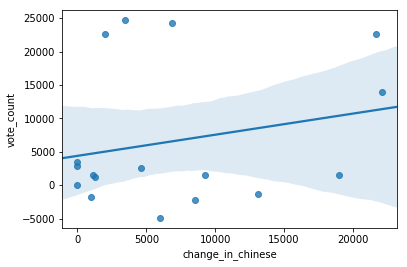

In [59]:
raceSummary('chinese')
createRaceDataFrame('chinese')

                            OLS Regression Results                            
Dep. Variable:        change_in_malay   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     3.973
Date:                Wed, 23 Jan 2019   Prob (F-statistic):             0.0636
Time:                        21:09:35   Log-Likelihood:                -153.71
No. Observations:                  17   AIC:                             309.4
Df Residuals:                      16   BIC:                             310.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vote_count     0.0842      0.042      1.993      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


,constituency_type,party,vote_count,vote_percentage,change_in_malay
constituency,,,,,
Aljunied,GRC,WP,-2239,-0.0376,411.0
Ang Mo Kio,GRC,RP,22639,0.0931,5362.0
Bishan-Toa Payoh,GRC,SPP,24316,0.1666,519.0
Bukit Panjang,SMC,SDP,1579,0.0211,2255.0
East Coast,GRC,WP,-4899,0.059,418.0
Holland-Bukit Timah,GRC,SDP,14013,0.0652,3783.0
Hong Kah North,SMC,SPP,1472,0.0415,99.0
Hougang,SMC,WP,-1823,-0.0714,81.0
Nee Soon,GRC,WP,1547,0.0843,5202.0


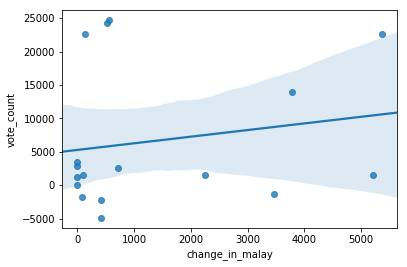

In [60]:
raceSummary('malay')
createRaceDataFrame('malay')

                            OLS Regression Results                            
Dep. Variable:       change_in_indian   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     3.792
Date:                Wed, 23 Jan 2019   Prob (F-statistic):             0.0693
Time:                        21:09:41   Log-Likelihood:                -140.38
No. Observations:                  17   AIC:                             282.8
Df Residuals:                      16   BIC:                             283.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vote_count     0.0376      0.019      1.947      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


,constituency_type,party,vote_count,vote_percentage,change_in_indian
constituency,,,,,
Aljunied,GRC,WP,-2239,-0.0376,1068.0
Ang Mo Kio,GRC,RP,22639,0.0931,1863.0
Bishan-Toa Payoh,GRC,SPP,24316,0.1666,180.0
Bukit Panjang,SMC,SDP,1579,0.0211,1433.0
East Coast,GRC,WP,-4899,0.059,1383.0
Holland-Bukit Timah,GRC,SDP,14013,0.0652,2052.0
Hong Kah North,SMC,SPP,1472,0.0415,-71.0
Hougang,SMC,WP,-1823,-0.0714,-180.0
Nee Soon,GRC,WP,1547,0.0843,2136.0


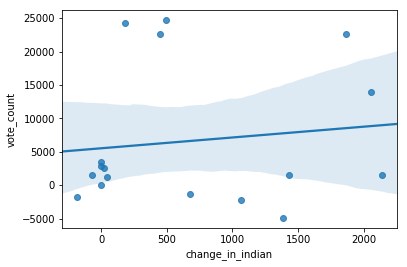

In [61]:
raceSummary('indian')
createRaceDataFrame('indian')

                            OLS Regression Results                            
Dep. Variable:        change_in_other   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     4.922
Date:                Wed, 23 Jan 2019   Prob (F-statistic):             0.0413
Time:                        21:09:41   Log-Likelihood:                -122.27
No. Observations:                  17   AIC:                             246.5
Df Residuals:                      16   BIC:                             247.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vote_count     0.0147      0.007      2.219      0.0

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


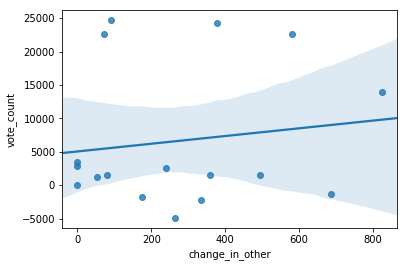

In [62]:
raceSummary('other')

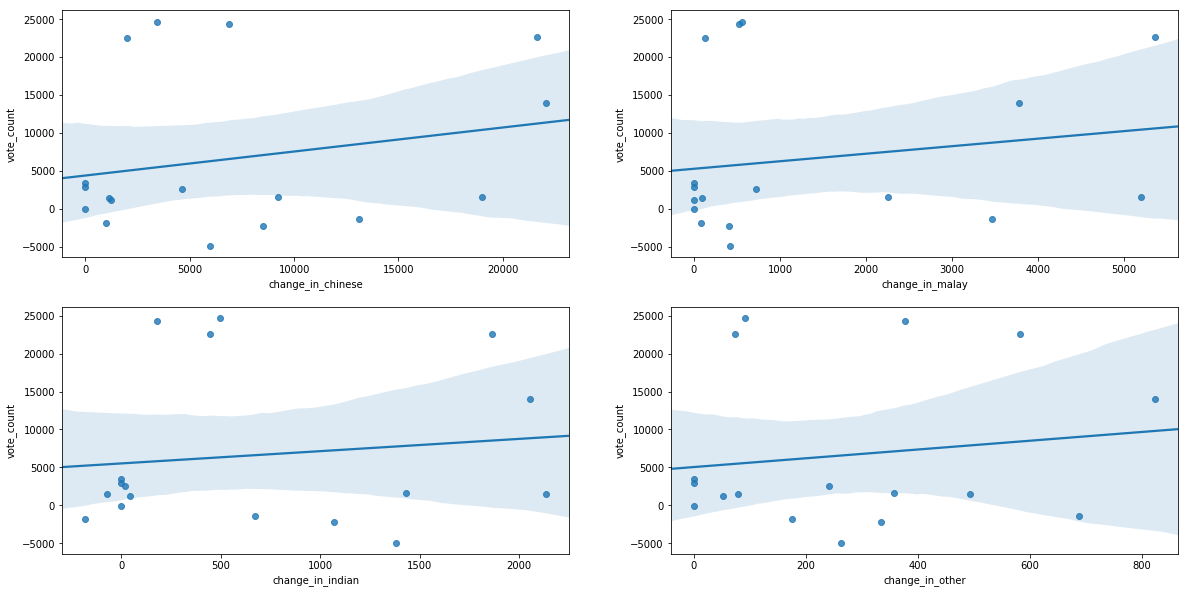

In [63]:
plt.subplots(figsize=(20,10))
a1 = plt.subplot(221)
a1 = plotRaceDataFrame('chinese')
a2 = plt.subplot(222)
a2 = plotRaceDataFrame('malay')
a3 = plt.subplot(223)
a3 = plotRaceDataFrame('indian')
a4 = plt.subplot(224)
a4 = plotRaceDataFrame('other')